The aim of this workbook is to explore the Integrated Gradients implementation.

### Modell trainieren

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


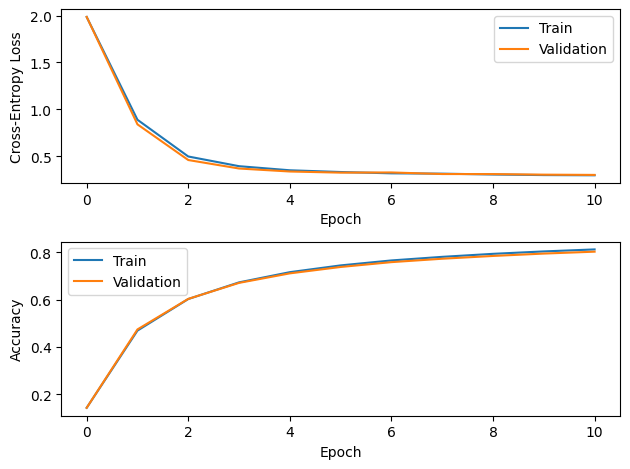

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

In [2]:
import torch

baseline = torch.zeros(16)

print(model.predict(baseline))

tensor([0.0527, 0.0015, 0.0485, 0.2691, 0.3350, 0.0223, 0.2709])


c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


# Instanzweises testen der IG scores

In [3]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print("Attribution Scores: "  + str(attribution_score))
print("Reihenfolge: " + str(attribution_score[0].argsort(descending=True)))

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


Attribution Scores: (tensor([-0.1033, -0.1716, -0.1565, -0.1553,  0.0070, -0.0072, -0.1057, -0.1858,
        -0.1543,  0.1351,  0.3169,  0.1249,  0.6285,  0.4284,  0.0385,  0.0562]), 3)
Reihenfolge: tensor([12, 13, 10,  9, 11, 15, 14,  4,  5,  0,  6,  8,  3,  2,  1,  7])


### Testen des Completeness Axioms durch Veränderung der num_steps

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


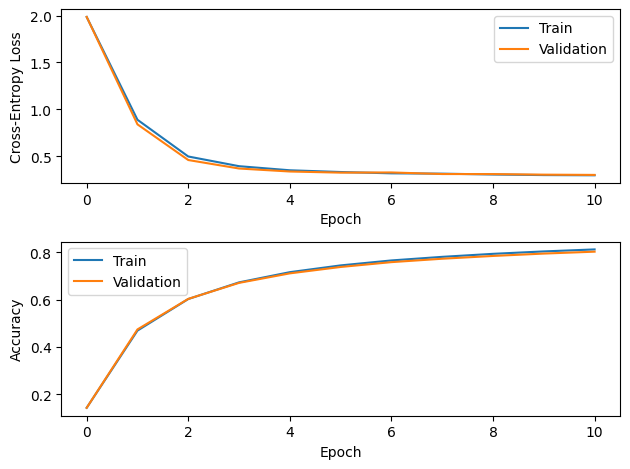

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:04, 284.93it/s]
33it [00:00, 107.16it/s]

In [4]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)

evaluator.visualize_completess_deltas_comparison(range(10,151,20))

num_steps = 30

In [ ]:
from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)
evaluator.completeness_deltas_statistics(n_steps=30)

0it [00:00, ?it/s]

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:12, 105.65it/s]

Mittlere absolute Abweichung:  2.00e-02
Maximum der betragsmäßigen Abweichung;  8.06e-02
Minimum der betragsmäßigen Abweichung:  4.77e-07


num_steps = 50

In [ ]:
evaluator.completeness_deltas_statistics(n_steps=50)

1362it [00:21, 64.84it/s]

Mittlere absolute Abweichung:  1.20e-02
Maximum der betragsmäßigen Abweichung;  5.20e-02
Minimum der betragsmäßigen Abweichung:  1.54e-05


num_steps = 100

In [ ]:
evaluator.completeness_deltas_statistics(n_steps=100)

1362it [00:42, 31.96it/s]

Mittlere absolute Abweichung:  5.90e-03
Maximum der betragsmäßigen Abweichung;  2.37e-02
Minimum der betragsmäßigen Abweichung:  1.00e-05


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


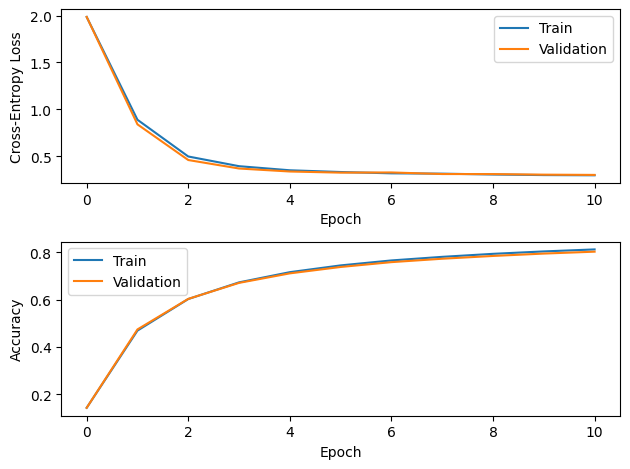

In [2]:
from model.training import train_model_and_visualize
from model.training import train_autobaseline
import torch

model = train_model_and_visualize([8], num_epochs=10)

In [4]:
from model.training import train_autobaseline
import torch

#model = train_model_and_visualize([8], num_epochs=10)

initial_baseline_prediction = model.predict(torch.zeros(16))
target_baseline_prediction = torch.ones_like(initial_baseline_prediction) * (1/7)
print(model.predict(torch.zeros(16)))
print(torch.nn.functional.l1_loss(target_baseline_prediction,initial_baseline_prediction))


torch.manual_seed(48)
initial_baseline=torch.FloatTensor(16).uniform_(0.005,0.01)


autobaseline = train_autobaseline(model, initial_baseline=initial_baseline, baseline_error_weight=0.4, num_epochs=300)
print(torch.nn.functional.l1_loss(target_baseline_prediction,model.predict(autobaseline)))

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


tensor([0.0527, 0.0015, 0.0485, 0.2691, 0.3350, 0.0223, 0.2709])
tensor(0.1276)


  0%|          | 0/300 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:11<00:00, 26.52it/s]

autobaseline: tensor([ 0.0072,  0.0059,  0.0060,  0.0057,  0.0092, -0.1650,  0.0077,  0.0086,
         0.0079,  0.0079,  0.0049,  0.0071, -0.0595,  0.0090,  0.0076,  0.0061],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2291, 0.0127, 0.1070, 0.1454, 0.1424, 0.0913, 0.2721])
tensor(0.0623)


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


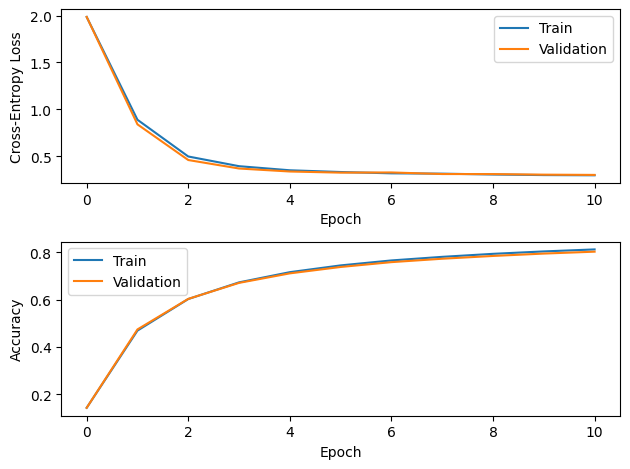

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


tensor([0.0527, 0.0015, 0.0485, 0.2691, 0.3350, 0.0223, 0.2709])
tensor([0.0006, 0.0002, 0.0002, 0.0008, 0.0002, 0.0005, 0.0008, 0.0003, 0.0005,
        0.0005, 0.0004, 0.0003, 0.0001, 0.0002, 0.0003, 0.0010])


  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
 30%|███       | 3/10 [00:00<00:00, 29.70it/s]

0
1
2
3
4
5
6


100%|██████████| 10/10 [00:00<00:00, 31.05it/s]

7
8
9
autobaseline: tensor([-0.0339, -0.0214, -0.0137, -0.0312, -0.1723, -0.2146, -0.0339, -0.0104,
        -0.0953, -0.0435, -0.1118, -0.0806, -0.1450, -0.0768, -0.0794, -0.0953],
       grad_fn=<SqueezeBackward4>)
prediction: tensor([0.2337, 0.0885, 0.1153, 0.1293, 0.1704, 0.1079, 0.1548])


In [ ]:
from model.training import train_model_and_visualize
from model.training import train_autobaseline
import torch

model = train_model_and_visualize([8], num_epochs=10)

print(model.predict(torch.zeros(16)))

initial_baseline=torch.FloatTensor(16).uniform_(0.0001,0.001)

print(initial_baseline)

train_autobaseline(model, initial_baseline=initial_baseline, baseline_error_weight=0.1)

In [ ]:
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(DatasetMode.TEST)

dataset[0][0].shape

torch.Size([16])